In [1]:
from data_preprocessing import decompress_pickle
import pandas as pd
from darts import TimeSeries
from darts.models.tcn_model import TCNModel
# from darts.models import ExponentialSmoothing # only works for univariate series
from darts.metrics import r2_score

Importing plotly failed. Interactive plots will not work.


In [2]:
df = decompress_pickle("../data/preprocessed/BikeRental_preprocessed.pbz2")

In [5]:
df.columns

Index(['datetime', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [3]:
series = TimeSeries.from_dataframe(df, time_col= 'datetime', value_cols=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


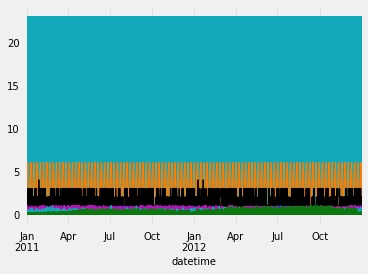

In [13]:
series.plot()

In [4]:

train, val = series.split_before(pd.Timestamp('20120601'))

In [8]:
train

                     season   yr  mnth  hr  holiday  weekday  workingday  \
datetime                                                                   
2011-01-01 00:00:00     1.0  0.0     1   0      0.0        5         0.0   
2011-01-01 01:00:00     1.0  0.0     1   1      0.0        5         0.0   
2011-01-01 02:00:00     1.0  0.0     1   2      0.0        5         0.0   
2011-01-01 03:00:00     1.0  0.0     1   3      0.0        5         0.0   
2011-01-01 04:00:00     1.0  0.0     1   4      0.0        5         0.0   
...                     ...  ...   ...  ..      ...      ...         ...   
2012-05-31 19:00:00     2.0  1.0     5  19      0.0        3         1.0   
2012-05-31 20:00:00     2.0  1.0     5  20      0.0        3         1.0   
2012-05-31 21:00:00     2.0  1.0     5  21      0.0        3         1.0   
2012-05-31 22:00:00     2.0  1.0     5  22      0.0        3         1.0   
2012-05-31 23:00:00     2.0  1.0     5  23      0.0        3         1.0   

           

In [10]:
# Create TCNModel instance
my_model = TCNModel(
    n_epochs=300,
    input_length=12,
    output_length=11,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=4,
    num_filters=3,
    random_state=0
)

# Fit model
my_model.fit(train, val_training_series=val, verbose=True)

# Evaluate model
def eval_model(model):
    pred_series = model.predict(13, True)
    plt.figure(figsize=(8,5))
    ts_transformed.univariate_component(0).plot(label='actual')
    pred_series.plot(label='forecast')
    plt.title('R2: {}'.format(r2_score(val_transformed.univariate_component(0), pred_series.slice_intersect(val_transformed))))
    plt.legend()
eval_model(my_model)

[2020-10-31 15:54:19,367] INFO | darts.models.tcn_model | Number of layers chosen: 2
[2020-10-31 15:54:19,367] INFO | darts.models.tcn_model | Number of layers chosen: 2
[2020-10-31 15:54:19,487] ERROR | darts.models.torch_forecasting_model | ValueError: The number of components of the training series must be equal to the `input_size` defined when instantiating the current model.
[2020-10-31 15:54:19,487] ERROR | darts.models.torch_forecasting_model | ValueError: The number of components of the training series must be equal to the `input_size` defined when instantiating the current model.


ValueError: The number of components of the training series must be equal to the `input_size` defined when instantiating the current model.